In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_audit = pd.read_csv(r"E:\python projects\Datasets\healthcare\audit_logs.csv")
data_consents = pd.read_csv(r"E:\python projects\Datasets\healthcare\consents.csv")
data_cpt = pd.read_csv(r"E:\python projects\Datasets\healthcare\cpt_codes.csv")
data_diagnoses = pd.read_csv(r"E:\python projects\Datasets\healthcare\diagnoses.csv")
data_encounters = pd.read_csv(r"E:\python projects\Datasets\healthcare\encounters.csv")
data_icd10 = pd.read_csv(r"E:\python projects\Datasets\healthcare\icd10_codes.csv")
data_observations = pd.read_csv(r"E:\python projects\Datasets\healthcare\observations.csv")
data_patients = pd.read_csv(r"E:\python projects\Datasets\healthcare\patients.csv")
data_practitioners = pd.read_csv(r"E:\python projects\Datasets\healthcare\practitioners.csv")
data_procedures = pd.read_csv(r"E:\python projects\Datasets\healthcare\procedures.csv")

In [4]:
data_audit.head()

,User_ID,Table_Name,Record_ID,Action_Type,Purpose_Code,Action_Timestamp,Audit_ID
0,jeremyjones,Procedure,52401,INSERT,TREATMENT,2025-06-22 23:05:33,1
1,mckinneyandrea,Procedure,102267,DELETE,NaN,2024-09-07 03:14:25,2
2,barbara69,Encounter,57280,DELETE,NaN,2025-02-12 10:04:51,3
3,umartinez,Encounter,215485,INSERT,INVALID,2023-11-19 01:40:17,4
4,qallen,Observation,214473,INVALID_ACTION,INVALID,2024-12-27 04:51:45,5


In [5]:
data_audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           10000 non-null  object
 1   Table_Name        10000 non-null  object
 2   Record_ID         10000 non-null  int64 
 3   Action_Type       10000 non-null  object
 4   Purpose_Code      7984 non-null   object
 5   Action_Timestamp  10000 non-null  object
 6   Audit_ID          10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [6]:
data_audit.isnull().sum()

User_ID                0
Table_Name             0
Record_ID              0
Action_Type            0
Purpose_Code        2016
Action_Timestamp       0
Audit_ID               0
dtype: int64

In [7]:
data_audit.duplicated().sum()

np.int64(0)

In [8]:
data_audit['Action_Timestamp'] = pd.to_datetime(data_audit['Action_Timestamp'])

data_audit['Table_Name'].unique()
data_audit['Action_Type'].unique()
data_audit['Purpose_Code'].unique()

print(data_audit['Table_Name'].unique())
print(data_audit['Action_Type'].unique())
print(data_audit['Purpose_Code'].unique())


print(data_audit['Action_Timestamp'].min())
print(data_audit['Action_Timestamp'].max())



['Procedure' 'Encounter' 'Observation' 'Diagnosis' 'Patient']
['INSERT' 'DELETE' 'INVALID_ACTION' 'UPDATE' 'SELECT']
['TREATMENT' nan 'INVALID' 'RESEARCH' 'BILLING']
2023-06-27 08:48:52
2025-06-26 20:01:49


| **Column Name**    | **Description**                                                                                                                             | 
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------- | 
| `Audit_ID`         | A unique identifier for each audit log entry (auto-incremented).                                                                            | 
| `User_ID`          | The ID of the user (e.g., analyst, system, admin) who performed the action.                                                                 | 
| `Table_Name`       | The name of the database table where the action took place. Could be `Procedure`, `Encounter`, `Observation`, etc.                          | 
| `Record_ID`        | The unique ID of the specific record (row) in the referenced table (`Table_Name`) that was affected by the action.                          | 
| `Action_Type`      | The type of action performed. Typical values: `SELECT`, `INSERT`, `UPDATE`, `DELETE`. Invalid or custom values may indicate logging errors. | 
| `Purpose_Code`     | The reason or legal basis for accessing the data. Examples: `TREATMENT`, `RESEARCH`, `PAYMENT`. `INVALID` or `NaN` may indicate issues.     | 
| `Action_Timestamp` | The exact date and time the action occurred, useful for auditing and traceability.                                                          |


In [9]:
data_audit['Purpose_Code'] = data_audit['Purpose_Code'].fillna('UNKNOWN_PURPOSE')

In [10]:
data_audit.isnull().sum()

User_ID             0
Table_Name          0
Record_ID           0
Action_Type         0
Purpose_Code        0
Action_Timestamp    0
Audit_ID            0
dtype: int64

in data_audit No duplicates , 2016 null value in purpose_code  filled with unknown purpose  , Action_type column with INVALID_ACTION Value &  Purpose_code column with INVALID_ACTION & Unknown Purpose Value are not Complaint with GDPR/HIPAA

In [11]:
data_consents.head()

,Patient_Surrogate_ID,Consent_Type_Code,Consent_Given_Date,Consent_Expires_Date,Consent_ID
0,33554,RESEARCH,2024-10-17,NaN,1
1,9428,TREATMENT,2024-05-13,2027-06-12,2
2,200,INVALID,2022-09-28,NaN,3
3,12448,TREATMENT,2022-10-20,2025-12-04,4
4,39490,INVALID,2025-06-02,2026-12-13,5


In [12]:
data_consents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_Surrogate_ID  35000 non-null  int64 
 1   Consent_Type_Code     35000 non-null  object
 2   Consent_Given_Date    35000 non-null  object
 3   Consent_Expires_Date  21015 non-null  object
 4   Consent_ID            35000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [13]:
data_consents.isnull().sum()

Patient_Surrogate_ID        0
Consent_Type_Code           0
Consent_Given_Date          0
Consent_Expires_Date    13985
Consent_ID                  0
dtype: int64

In [14]:
data_consents.duplicated().sum()

np.int64(0)

In [15]:
data_consents['Consent_Given_Date'] = pd.to_datetime(data_consents['Consent_Given_Date'], errors='coerce')
data_consents['Consent_Expires_Date'] = pd.to_datetime(data_consents['Consent_Expires_Date'], errors='coerce')

In [16]:
print(data_consents['Consent_Type_Code'].unique())
print(data_consents['Consent_Given_Date'].min())
print(data_consents['Consent_Given_Date'].max())
print(data_consents['Consent_Expires_Date'].min())
print(data_consents['Consent_Expires_Date'].max())

['RESEARCH' 'TREATMENT' 'INVALID' 'SHARING']
2022-06-26 00:00:00
2025-06-25 00:00:00
2025-06-26 00:00:00
2027-06-25 00:00:00


| **Column Name**        |  **Meaning / Description**                                                                                                                                                                   |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `Patient_Surrogate_ID` |  A **pseudonymized internal patient ID**, used to uniquely identify patients without exposing PHI. This ID links consent and clinical records without revealing the actual patient identity. |
| `Consent_Type_Code`    |  Indicates the **type of consent** given by the patient. Examples: `'treatment'`, `'research'`, `'marketing'`, or `'data_sharing'`. Useful for compliance filtering.                         |
| `Consent_Given_Date`   |  The **date the patient gave their consent** for the specified purpose. This is required to validate lawful processing of data.                                                              |
| `Consent_Expires_Date` |  The **expiry date** of the consent, after which the data should no longer be used for the specified purpose unless re-consent is obtained.                                                  |
| `Consent_ID`           |  A **unique identifier for the consent record** itself (primary key). Used to track individual consent instances per patient.                                                                |


In [17]:
data_consents['Consent_Expires_Date'] = data_consents['Consent_Expires_Date'].fillna(data_consents['Consent_Given_Date']+pd.Timedelta(days=1095))

In [18]:
data_consents.isnull().sum()

Patient_Surrogate_ID    0
Consent_Type_Code       0
Consent_Given_Date      0
Consent_Expires_Date    0
Consent_ID              0
dtype: int64

in data_consents no Duplicates , 13985 null values in Consent_Expires_Date filled with date after 3 years

In [19]:
data_cpt.head()

,CPT_Code,Description
0,99213,Matter dark ready meet city care.
1,93000,Rule another whom five perform create trade.
2,80053,Message budget join indeed forward everybody.
3,81002,Little other market today body movie eat.
4,12002,Upon kid wait happen alone.


In [20]:
data_cpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CPT_Code     7 non-null      object
 1   Description  7 non-null      object
dtypes: object(2)
memory usage: 244.0+ bytes


In [21]:
data_cpt['CPT_Code'] = pd.to_numeric(data_cpt['CPT_Code'], errors='coerce')

In [22]:
data_cpt.isnull().sum()

CPT_Code       1
Description    0
dtype: int64

In [23]:
data_cpt.duplicated().sum()

np.int64(0)

In [24]:
data_cpt['CPT_Code'].unique()

array([99213., 93000., 80053., 81002., 12002., 71045.,    nan])

In [25]:
data_cpt[data_cpt['CPT_Code'].isnull()]

,CPT_Code,Description
6,NaN,Yard third take son indeed.


In [26]:
data_cpt['Description'].unique()

array(['Matter dark ready meet city care.',
       'Rule another whom five perform create trade.',
       'Message budget join indeed forward everybody.',
       'Little other market today body movie eat.',
       'Upon kid wait happen alone.',
       'Natural car century foot less model play.',
       'Yard third take son indeed.'], dtype=object)

| **Column Name** | **Description**                                                                                                                                                                                                       |
| --------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `CPT_Code`      | A 5-character standardized code from the **Current Procedural Terminology (CPT)** system. It represents a specific **medical procedure or service** (e.g., `99213` = "Office/outpatient visit, established patient"). |
| `Description`   | A **human-readable label** or name for the CPT code — explaining what the procedure entails (e.g., "MRI of brain without contrast").                                                                                  |


In [27]:
# Assuming your DataFrame is named data_cpt
data_cpt = pd.DataFrame({
    'CPT_Code': [99213.0, 93000.0, 80053.0, 81002.0, 12002.0, 71045.0, np.nan],
    'Description': [
        "Matter dark ready meet city care.",  
        "Rule another whom five perform create trade.",  
        "Message budget join indeed forward everybody.",  
        "Little other market today body movie eat.",  
        "Upon kid wait happen alone.",  
        "Natural car century foot less model play.",  
        "Yard third take son indeed."  
    ]
})

# Correct CPT descriptions dictionary
correct_descriptions = {
    99213.0: "Office or other outpatient visit for evaluation and management of an established patient, typically 15 minutes.",
    93000.0: "Electrocardiogram, routine ECG with at least 12 leads; with interpretation and report.",
    80053.0: "Comprehensive metabolic panel (CMP).",
    81002.0: "Urinalysis, by dip stick or tablet reagent; non-automated, without microscopy.",
    12002.0: "Simple repair of superficial wounds of scalp, neck, axillae, external genitalia, trunk and/or extremities (2.5 cm or less).",
    71045.0: "Radiologic examination, chest; single view, frontal."
}

# Replace wrong descriptions using CPT_Code
def update_description(row):
    if pd.isna(row['CPT_Code']):
        return "Missing CPT code - procedure description not available."
    return correct_descriptions.get(row['CPT_Code'], row['Description'])

data_cpt['Description'] = data_cpt.apply(update_description, axis=1)

print(data_cpt)


   CPT_Code                                        Description
0   99213.0  Office or other outpatient visit for evaluatio...
1   93000.0  Electrocardiogram, routine ECG with at least 1...
2   80053.0               Comprehensive metabolic panel (CMP).
3   81002.0  Urinalysis, by dip stick or tablet reagent; no...
4   12002.0  Simple repair of superficial wounds of scalp, ...
5   71045.0  Radiologic examination, chest; single view, fr...
6       NaN  Missing CPT code - procedure description not a...


In [28]:
data_cpt

,CPT_Code,Description
0,99213.0,Office or other outpatient visit for evaluatio...
1,93000.0,"Electrocardiogram, routine ECG with at least 1..."
2,80053.0,Comprehensive metabolic panel (CMP).
3,81002.0,"Urinalysis, by dip stick or tablet reagent; no..."
4,12002.0,"Simple repair of superficial wounds of scalp, ..."
5,71045.0,"Radiologic examination, chest; single view, fr..."
6,NaN,Missing CPT code - procedure description not a...


| **CPT Code** | **Description**                                                                                                             |
| ------------ | --------------------------------------------------------------------------------------------------------------------------- |
| 99213        | Office or other outpatient visit for the evaluation and management of an established patient, typically 15 minutes.         |
| 93000        | Electrocardiogram, routine ECG with at least 12 leads; with interpretation and report.                                      |
| 80053        | Comprehensive metabolic panel (CMP).                                                                                        |
| 81002        | Urinalysis, by dip stick or tablet reagent; non-automated, without microscopy.                                              |
| 12002        | Simple repair of superficial wounds of scalp, neck, axillae, external genitalia, trunk and/or extremities (2.5 cm or less). |
| 71045        | Radiologic examination, chest; single view, frontal.                                                                        |
| NULL (nan)   | Missing CPT code — no procedure code provided.                                                                              |


in data_cpt one null value in cpt_code and the description column to be changed to correct ones 

In [29]:
data_diagnoses.head()

,Encounter_ID,ICD10_Code,Diagnosis_Rank,Last_Update_Timestamp,Diagnosis_ID
0,1,I10,1,2022-01-13 07:48:36,1
1,1,R5383,2,2022-01-14 04:59:11,2
2,1,E785,3,2022-01-14 12:36:26,3
3,2,N390,1,2021-05-10 12:12:30,4
4,2,E785,2,2021-05-23 21:48:25,5


In [30]:
data_diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623886 entries, 0 to 623885
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Encounter_ID           623886 non-null  int64 
 1   ICD10_Code             623886 non-null  object
 2   Diagnosis_Rank         623886 non-null  int64 
 3   Last_Update_Timestamp  623886 non-null  object
 4   Diagnosis_ID           623886 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 23.8+ MB


In [31]:
data_diagnoses['Last_Update_Timestamp'] = pd.to_datetime(data_diagnoses['Last_Update_Timestamp'])

In [32]:
data_diagnoses['ICD10_Code'].unique()

array(['I10', 'R5383', 'E785', 'N390', 'J4520', 'K219', 'X999', 'G4733',
       'M545', 'G999', 'X9O9', 'X99q', 'Xz99', 'X99T', 'X9m9', 'W999',
       'X9M9', 'Xs99', 'B999', 'X99E', 'X99j', 'X9g9', 'Xd99', 'Xb99',
       'XJ99', 'XI99', 'X99S', 'Xy99', 'X9T9', 'X99w', 'k999', 'X9Z9',
       'X9R9', 'Xq99', 'X9B9', 'XM99', 'L999', 'J999', 'X9H9', 'X99V',
       'X9p9', 'XL99', 'X9r9', 'XP99', 'M999', 'f999', 'I999', 'Xn99',
       'XS99', 'X99y', 'X9E9', 'XA99', 'X99R', 'X9j9', 'XR99', 'X9I9',
       'X99K', 'XB99', 's999', 'XV99', 'X99p', 'X9S9', 'X99g', 'b999',
       'X9i9', 'g999', 'X99P', 'XW99', 'A999', 'XK99', 'X9u9', 'X9L9',
       'X9h9', 'V999', 'R999', 'X9Q9', 'X9K9', 'X9F9', 'X99o', 'E999',
       'XX99', 'X9t9', 'XZ99', 'X9s9', 'X9f9', 'S999', 'U999', 'C999',
       'XQ99', 'X99n', 'Xv99', 'X9D9', 'X9y9', 'X99u', 'X99Q', 'X99r',
       'X9J9', 'XH99', 'X9v9', 'r999', 'X99C', 'x999', 'X99U', 'X9U9',
       'Xi99', 'Q999', 'H999', 'X99m', 'X9c9', 'Xl99', 'XF99', 'Xr99',
    

In [33]:
data_diagnoses.isnull().sum()

Encounter_ID             0
ICD10_Code               0
Diagnosis_Rank           0
Last_Update_Timestamp    0
Diagnosis_ID             0
dtype: int64

In [34]:
data_diagnoses.duplicated().sum()

np.int64(0)

| **Column Name**         | **Description**                                                                                                             |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| `Encounter_ID`          | Unique identifier linking the diagnosis to a specific patient encounter or visit.                                           |
| `ICD10_Code`            | Standardized **ICD-10 diagnosis code** representing the medical condition (e.g., E11 for Type 2 Diabetes).                  |
| `Diagnosis_Rank`        | Indicates whether the diagnosis is **primary** (`1`) or **secondary** (`2`, `3`, etc.), useful for prioritizing conditions. |
| `Last_Update_Timestamp` | The **date and time** the diagnosis record was last created or updated, useful for auditing and tracking data changes.      |
| `Diagnosis_ID`          | Unique identifier for each row in the **Diagnosis** table; serves as the primary key.                                       |


no nulls & no duplicates in data_diagnoses

In [35]:
data_encounters.head()

,Patient_Surrogate_ID,Encounter_Date,Encounter_Type_Code,Location_Code,Attending_Prov_ID,Last_Update_Timestamp,Encounter_ID
0,1,2021-12-16,INP,HOSP2,211.0,2022-01-11 21:52:28,1
1,1,2021-05-06,OUT,NaN,72.0,2021-04-28 21:43:59,2
2,2,2025-05-31,INP,XX999,234.0,2025-05-12 07:25:46,3
3,2,2021-11-28,URG,CLIN1,44.0,2021-12-16 18:35:34,4
4,2,2025-03-20,NaN,MAIN,74.0,2025-03-13 04:01:51,5


In [36]:
data_encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249811 entries, 0 to 249810
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Patient_Surrogate_ID   249811 non-null  int64  
 1   Encounter_Date         249811 non-null  object 
 2   Encounter_Type_Code    208223 non-null  object 
 3   Location_Code          208119 non-null  object 
 4   Attending_Prov_ID      249299 non-null  float64
 5   Last_Update_Timestamp  249811 non-null  object 
 6   Encounter_ID           249811 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.3+ MB


In [37]:
data_encounters['Last_Update_Timestamp'] = pd.to_datetime(data_encounters['Last_Update_Timestamp'])
data_encounters['Encounter_Date'] = pd.to_datetime(data_encounters['Encounter_Date'])
data_encounters['Patient_Surrogate_ID'] = data_encounters['Patient_Surrogate_ID'].astype('int64')

In [38]:
data_encounters.isnull().sum()

Patient_Surrogate_ID         0
Encounter_Date               0
Encounter_Type_Code      41588
Location_Code            41692
Attending_Prov_ID          512
Last_Update_Timestamp        0
Encounter_ID                 0
dtype: int64

In [39]:
data_encounters['Encounter_Type_Code'].fillna('Missing', inplace=True)
data_encounters['Location_Code'].fillna('Missing', inplace=True)

In [40]:
data_encounters['Encounter_Type_Code'].unique()

array(['INP', 'OUT', 'URG', 'Missing', 'ER', 'INVALID'], dtype=object)

In [41]:
data_encounters['Location_Code'].unique()

array(['HOSP2', 'Missing', 'XX999', 'CLIN1', 'MAIN', 'ER1'], dtype=object)

In [42]:
data_encounters['Encounter_ID'].unique()

array([     1,      2,      3, ..., 249809, 249810, 249811])

| **Column Name**             | **Description**                                                                   |
| --------------------------- | --------------------------------------------------------------------------------- |
| **Patient\_Surrogate\_ID**  | A unique internal ID that represents a de-identified patient in the system.       |
| **Encounter\_Date**         | The date when the patient’s healthcare encounter (visit/admission) occurred.      |
| **Encounter\_Type\_Code**   | A code that indicates the type of encounter (e.g., outpatient, inpatient, ER).    |
| **Location\_Code**          | A code that represents the facility or site where the encounter took place.       |
| **Attending\_Prov\_ID**     | A reference ID to the healthcare provider (doctor) responsible for the encounter. |
| **Last\_Update\_Timestamp** | The date and time when this encounter record was last modified or updated.        |
| **Encounter\_ID**           | A unique ID for the encounter/visit itself, used as the primary key.              |


in data_encounters  41588 null values in Encounter_Type_Code , 41692 null values in Location_Code , 512 null values in Attending_Prov_ID & Missing values in location_code , also missing values in encouter_type_code

In [43]:
data_icd10.head()

,ICD10_Code,Description
0,J4520,The ever born water.
1,I10,Call pick mother fine.
2,E785,Long meet question democratic.
3,M545,Least both pattern city perhaps realize style ...
4,G4733,Myself fill summer.


In [44]:
data_icd10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ICD10_Code   9 non-null      object
 1   Description  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [45]:
data_icd10.isnull().sum()

ICD10_Code     0
Description    0
dtype: int64

In [46]:
data_icd10.duplicated().sum()

np.int64(0)

In [47]:
data_icd10['ICD10_Code'].unique()

array(['J4520', 'I10', 'E785', 'M545', 'G4733', 'K219', 'N390', 'R5383',
       'X999'], dtype=object)

In [48]:
data_icd10['Description'].unique()

array(['The ever born water.', 'Call pick mother fine.',
       'Long meet question democratic.',
       'Least both pattern city perhaps realize style less.',
       'Myself fill summer.',
       'Training notice after organization special possible.',
       'Military your drive note even authority catch.',
       'Project pay anything business administration.',
       'Fact back mind along explain.'], dtype=object)

In [49]:
# Original data
icd_codes = ['J4520', 'I10', 'E785', 'M545', 'G4733', 'K219', 'N390', 'R5383', 'X999']
wrong_descriptions = [
    'The ever born water.',
    'Call pick mother fine.',
    'Long meet question democratic.',
    'Least both pattern city perhaps realize style less.',
    'Myself fill summer.',
    'Training notice after organization special possible.',
    'Military your drive note even authority catch.',
    'Project pay anything business administration.',
    'Fact back mind along explain.'
]

# DataFrame with wrong descriptions
data_icd10 = pd.DataFrame({'ICD10_Code': icd_codes, 'Wrong_Description': wrong_descriptions})

# Dictionary of correct ICD-10 descriptions
correct_icd_descriptions = {
    'J4520': 'Mild intermittent asthma, uncomplicated',
    'I10': 'Essential (primary) hypertension',
    'E785': 'Hyperlipidemia, unspecified',
    'M545': 'Low back pain',
    'G4733': 'Obstructive sleep apnea (adult) (pediatric)',
    'K219': 'Gastro-esophageal reflux disease without esophagitis',
    'N390': 'Urinary tract infection, site not specified',
    'R5383': 'Other fatigue',
    'X999': 'Invalid Code'
}

# Replace wrong descriptions with correct ones
data_icd10['Correct_Description'] = data_icd10['ICD10_Code'].map(correct_icd_descriptions)

# Show result
print(data_icd10)


  ICD10_Code                                  Wrong_Description  \
0      J4520                               The ever born water.   
1        I10                             Call pick mother fine.   
2       E785                     Long meet question democratic.   
3       M545  Least both pattern city perhaps realize style ...   
4      G4733                                Myself fill summer.   
5       K219  Training notice after organization special pos...   
6       N390     Military your drive note even authority catch.   
7      R5383      Project pay anything business administration.   
8       X999                      Fact back mind along explain.   

                                 Correct_Description  
0            Mild intermittent asthma, uncomplicated  
1                   Essential (primary) hypertension  
2                        Hyperlipidemia, unspecified  
3                                      Low back pain  
4        Obstructive sleep apnea (adult) (pediatric)  

In [50]:
data_icd10.drop('Wrong_Description', axis=1, inplace=True)
data_icd10.rename(columns={'Correct_Description': 'Description'}, inplace=True)

In [51]:
data_icd10.head()

,ICD10_Code,Description
0,J4520,"Mild intermittent asthma, uncomplicated"
1,I10,Essential (primary) hypertension
2,E785,"Hyperlipidemia, unspecified"
3,M545,Low back pain
4,G4733,Obstructive sleep apnea (adult) (pediatric)


| **Column Name** |**Description**                                                                                                                                                                                                                                                                                                                             |
| --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `ICD10_Code`    | The **International Classification of Diseases, 10th Revision (ICD-10)** code assigned to a diagnosis or condition. These codes are alphanumeric and standardized globally for recording diseases, symptoms, abnormal findings, and external causes of injury or diseases (e.g., `E11.9` = Type 2 diabetes mellitus without complications). |
| `Description`   | A **textual explanation** of the medical diagnosis or condition represented by the ICD-10 code. This description is used by analysts and clinicians to understand the meaning of the code without referencing external materials.                                                                                                           |


data_icd10   no null values but changed the wrong description with the correct description 

In [52]:
data_observations.head()

,Encounter_ID,LOINC_Code,Value_Num,Value_Unit,Observation_DateTime,Last_Update_Timestamp,Observation_ID
0,178822,2339-0,65.35,NaN,2021-05-15T05:52:30,2024-07-31T15:06:17,51712554
1,22402,29463-7,55.16,ng/mL,2023-05-25T10:57:15,2024-08-24T19:35:18,87124819
2,101533,12345D6,52.41,IU/L,2021-06-02T05:40:09,2025-03-22T15:45:06,74757586
3,140482,789-8,65.34,g/L,2022-05-24T18:11:56,2025-05-21T05:27:58,53937550
4,63017,2339-0,53.66,mg/dL,2022-02-13T13:48:59,2025-04-08T11:22:45,19321196


In [53]:
data_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Encounter_ID           50000 non-null  int64  
 1   LOINC_Code             50000 non-null  object 
 2   Value_Num              47611 non-null  float64
 3   Value_Unit             42369 non-null  object 
 4   Observation_DateTime   50000 non-null  object 
 5   Last_Update_Timestamp  50000 non-null  object 
 6   Observation_ID         50000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [54]:
data_observations.isnull().sum()

Encounter_ID                0
LOINC_Code                  0
Value_Num                2389
Value_Unit               7631
Observation_DateTime        0
Last_Update_Timestamp       0
Observation_ID              0
dtype: int64

In [55]:
data_observations['Value_Unit'].fillna('Missing', inplace=True)

In [56]:
data_observations.duplicated().sum()

np.int64(0)

In [57]:
data_observations['Observation_DateTime'] = pd.to_datetime(data_observations['Observation_DateTime'])
data_observations['Last_Update_Timestamp'] = pd.to_datetime(data_observations['Last_Update_Timestamp'])
data_observations['Value_Num'] = pd.to_numeric(data_observations['Value_Num'], errors='coerce')

In [58]:
data_observations['LOINC_Code'].unique()

array(['2339-0', '29463-7', '12345D6', '789-8', '1w345-6', '12r45-6',
       '6690-2', '2345-6', '1234I-6', '77889-0', 'abcde-1', '1234D-6',
       '12345-6', '9999-A', '1234r-6', '12s45-6', '12345f6', '33914-3'],
      dtype=object)

| **Column Name**         | **Description**                                                                                                                                                                                                    |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `Encounter_ID`          | A unique identifier for the clinical encounter (e.g., hospital visit or consultation). Links this observation to a specific patient visit.                                                                         |
| `LOINC_Code`            | A standardized code from the **LOINC** (Logical Observation Identifiers Names and Codes) system that identifies the specific lab test, measurement, or clinical observation (e.g., blood glucose, blood pressure). |
| `Value_Num`             | The **numeric result** of the observation or lab test (e.g., 120.5 for systolic blood pressure).                                                                                                                   |
| `Value_Unit`            | The **unit of measurement** for `Value_Num` (e.g., mg/dL, mmHg, °C). Must align with LOINC's standard units.                                                                                                       |
| `Observation_DateTime`  | The **timestamp** when the observation was made or recorded (e.g., when the lab sample was drawn or vital sign measured).                                                                                          |
| `Last_Update_Timestamp` | The **timestamp** of the most recent update to this record, indicating data freshness or last ETL sync.                                                                                                            |
| `Observation_ID`        | A unique identifier for this specific observation record. Used as a primary key in the `Observation` table.                                                                                                        |


data_observations  no duplicates , 2389 null values in column Value_Num , 7631 null values in Value_Unit

In [59]:
data_patients.head()

,Patient_Hash_ID,Gender_Code,Birth_Year,Zip3_Code,Race_Ethnicity_Code,Last_Update_Timestamp,Patient_Surrogate_ID
0,2b15b8261ea36b65b09cfbf565fbc5a1f825cc71f0e699...,X,1994.0,365,BLACK,2022-07-27 11:51:41,1
1,21bb9861c8c2ed9e886d2c90f253fe0b789c5d30363c06...,F,1986.0,891,OTHER,2025-02-15 00:52:39,2
2,98061dd8dc943f1fc1a99de3c507309fd7566952ee9092...,M,1904.0,oLIS,NaN,2020-09-27 05:14:34,3
3,5715d065aaee01497776a3485748a0d0789acbb606a23d...,NaN,1957.0,794,UNKNOWN,2020-09-17 02:03:59,4
4,e8c05962d833a285d12dc6cea403ca9eff942f6385eb65...,A,NaN,924,NaN,2025-02-13 17:10:59,5


In [60]:
data_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_Hash_ID        50000 non-null  object 
 1   Gender_Code            42909 non-null  object 
 2   Birth_Year             48014 non-null  float64
 3   Zip3_Code              50000 non-null  object 
 4   Race_Ethnicity_Code    42808 non-null  object 
 5   Last_Update_Timestamp  50000 non-null  object 
 6   Patient_Surrogate_ID   50000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [61]:
data_patients.isnull().sum()

Patient_Hash_ID             0
Gender_Code              7091
Birth_Year               1986
Zip3_Code                   0
Race_Ethnicity_Code      7192
Last_Update_Timestamp       0
Patient_Surrogate_ID        0
dtype: int64

In [62]:
data_patients.duplicated().sum()

np.int64(0)

In [63]:
data_patients['Last_Update_Timestamp'] = pd.to_datetime(data_patients['Last_Update_Timestamp'])

In [64]:
data_patients['Gender_Code'].unique()

array(['X', 'F', 'M', nan, 'A', 'U', 'O'], dtype=object)

In [65]:
data_patients['Birth_Year'].unique()

array([1994., 1986., 1904., 1957.,   nan, 1919., 1948., 2003., 1929.,
       1912., 1920., 2019., 1968., 2018., 2007., 2020., 1963., 1917.,
       1974., 1914., 1976., 1967., 1987., 1998., 1958., 1925., 1999.,
       1902., 1930., 1962., 1916., 2011., 1988., 1983., 1928., 1975.,
       1965., 2000., 1984., 1993., 1951., 1924., 1935., 2010., 1969.,
       1921., 2015., 1933., 1989., 1906., 1907., 1979., 1940., 1927.,
       2012., 1901., 1913., 1926., 1981., 1956., 2006., 1905., 1945.,
       1995., 2002., 2001., 1955., 2025., 1946., 1985., 1910., 1911.,
       1953., 1949., 1900., 1966., 1915., 1971., 1992., 1909., 2014.,
       1942., 1941., 2021., 1972., 1947., 1991., 1931., 1944., 1982.,
       2023., 1934., 1978., 1943., 1960., 1970., 1932., 1997., 1937.,
       1961., 1938., 1977., 1922., 1923., 2024., 1939., 2009., 2013.,
       1990., 1959., 1954., 2016., 1936., 1950., 2005., 1908., 1964.,
       2008., 2004., 2022., 1918., 1973., 1903., 1952., 1996., 2017.,
       1980.])

In [66]:
data_patients['Birth_Year'] = pd.to_numeric(data_patients['Birth_Year'], errors='coerce')

In [67]:
data_patients['Race_Ethnicity_Code'].unique()

array(['BLACK', 'OTHER', nan, 'UNKNOWN', 'WHITE', 'HISP', 'ASIAN'],
      dtype=object)

In [68]:
data_patients['Race_Ethnicity_Code'].fillna('Missing', inplace=True)
data_patients['Gender_Code'].fillna('Missing', inplace=True)

data_patients  no duplicates , with the following nulls in the following columns 
Gender_Code              7091 "Filled with Missing"
Birth_Year               1986
Race_Ethnicity_Code      7192 "Filled with Missing"

| **Column Name**         | **Description**                                                                                                                                                                          |
| ----------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `Patient_Hash_ID`       | A **hashed (pseudonymized)** identifier for the patient, used to protect privacy.                                                                                                        |
| `Gender_Code`           | Encoded gender value (e.g., `'M'` = Male, `'F'` = Female, `'O'` = Other, `'U'` = Unknown).                                                                                               |
| `Birth_Year`            | The patient's year of birth (e.g., `1985`). Full birthdate is excluded for privacy.                                                                                                      |
| `Zip3_Code`             | First three digits of the patient's postal ZIP code, to limit geographic identifiability.                                                                                                |
| `Race_Ethnicity_Code`   | Encoded race/ethnicity category (e.g., `'W'` = White, `'B'` = Black, `'A'` = Asian, etc.).                                                                                               |
| `Last_Update_Timestamp` | The timestamp when the patient record was last updated in the system.                                                                                                                    |
| `Patient_Surrogate_ID`  | An internal **primary key** (auto-incremented) used for database joins and indexing.                                                                                                     |


In [69]:
data_practitioners.head()

,Practitioner_Hash_ID,Specialty_Code,Last_Update_Timestamp,Practitioner_ID
0,fde264e4768d7a98bb597b0312c7007c35773278b3af5d...,NaN,2025-04-26 08:04:54,1
1,378ff07358b0d5d1834b9f05b290ccbe67adf8d79c8fbb...,ONC,2021-05-06 09:54:55,2
2,c83a20747e76cdaacf5865cae590625fdc235ad959a3a8...,NaN,2024-07-02 09:01:16,3
3,c11017dd40d97f65e9bb5b5d0a2bb1cace1388167b1221...,SURG,2021-09-11 13:16:23,4
4,db47a2058bed29c19fe06edecd1e63bdd5b8c7c7334420...,PCP,2024-01-13 16:17:12,5


In [70]:
data_practitioners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Practitioner_Hash_ID   500 non-null    object
 1   Specialty_Code         434 non-null    object
 2   Last_Update_Timestamp  500 non-null    object
 3   Practitioner_ID        500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [71]:
data_practitioners.isnull().sum()

Practitioner_Hash_ID      0
Specialty_Code           66
Last_Update_Timestamp     0
Practitioner_ID           0
dtype: int64

In [72]:
data_practitioners.duplicated().sum()

np.int64(0)

In [73]:
data_practitioners['Last_Update_Timestamp'] = pd.to_datetime(data_practitioners['Last_Update_Timestamp'])

In [74]:
data_practitioners['Specialty_Code'].unique()

array([nan, 'ONC', 'SURG', 'PCP', 'UNKNOWN', 'CARD', 'ER'], dtype=object)

In [75]:
data_practitioners['Specialty_Code'].fillna('Missing', inplace=True)

| **Column Name**         | **Description**                                                                                                                       |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| `Practitioner_ID`       | A unique surrogate key (auto-incremented) used to identify each practitioner internally.                                              |
| `Practitioner_Hash_ID`  | A pseudonymized, hashed version of the practitioner's real identifier (e.g., NPI) used to preserve privacy while allowing linkage.    |
| `Specialty_Code`        | A code representing the practitioner's clinical specialty (e.g., cardiology, pediatrics). May refer to a lookup table for full names. |
| `Last_Update_Timestamp` | The date and time when this practitioner's record was last modified, used for data version control and audits.                        |


data_practitioners No duplicates , 66 null values in Specialty_Code filled with missing

In [76]:
data_procedures.head()

,Encounter_ID,CPT_Code,Procedure_DateTime,Last_Update_Timestamp,Procedure_ID
0,1,80053,2021-12-16,2021-12-22 04:36:10,1
1,1,81002,2021-12-16,2021-12-22 10:51:41,2
2,1,99213,2021-12-16,2021-12-12 23:34:58,3
3,2,93000,2021-05-06,2021-05-07 08:47:48,4
4,2,71045,2021-05-06,2021-04-30 12:19:01,5


In [77]:
data_procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374726 entries, 0 to 374725
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Encounter_ID           374726 non-null  int64 
 1   CPT_Code               374726 non-null  object
 2   Procedure_DateTime     374726 non-null  object
 3   Last_Update_Timestamp  374726 non-null  object
 4   Procedure_ID           374726 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 14.3+ MB


In [78]:
data_procedures.isnull().sum()

Encounter_ID             0
CPT_Code                 0
Procedure_DateTime       0
Last_Update_Timestamp    0
Procedure_ID             0
dtype: int64

In [79]:
data_procedures.duplicated().sum()

np.int64(0)

In [80]:
data_procedures['Procedure_DateTime'] = pd.to_datetime(data_procedures['Procedure_DateTime'])
data_procedures['Last_Update_Timestamp'] = pd.to_datetime(data_procedures['Last_Update_Timestamp'])

In [81]:
data_procedures['CPT_Code'].unique()

array(['80053', '81002', '99213', '93000', '71045', '12002', '9999X',
       'm999X', '99n9X', '99q9X', '9999F', '9q99X', '9A99X', 'S999X',
       '9n99X', '99A9X', 'F999X', '999eX', '9Y99X', '9J99X', '99Y9X',
       '999LX', 'v999X', '99t9X', '999fX', 'L999X', '9999x', 'n999X',
       '99O9X', '9999K', '999qX', '99a9X', '99k9X', '9T99X', '999XX',
       'E999X', 'b999X', '9f99X', 'A999X', '9M99X', '999MX', '9999A',
       '999vX', 'P999X', '9B99X', 'c999X', '99h9X', '9G99X', '9999t',
       'l999X', 'r999X', '99K9X', 'f999X', '999AX', '99L9X', '99M9X',
       '99i9X', '9L99X', '9t99X', '9m99X', '99c9X', '99v9X', '9W99X',
       '9P99X', 'i999X', '999TX', '99Z9X', '9999Q', '9999g', '999yX',
       '9999D', '9999B', 'W999X', '9j99X', '9999m', '9999U', '9999o',
       '999xX', '99B9X', 'T999X', '9r99X', '999jX', '9K99X', '9999f',
       '9E99X', '9V99X', 'q999X', '9S99X', '9999Z', 'J999X', 'a999X',
       'D999X', '9999P', 'd999X', 'y999X', '9999S', '999dX', '999wX',
       'K999X', '9o9

| **Column Name**         | **Description**                                                                                                             |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| `Encounter_ID`          | Unique identifier referencing the patient’s clinical visit or hospitalization. Links the procedure to a specific encounter. |
| `CPT_Code`              | A 5-digit **Current Procedural Terminology** code that represents the medical procedure performed (e.g., imaging, surgery). |
| `Procedure_DateTime`    | The **exact date and time** when the procedure was performed.                                                               |
| `Last_Update_Timestamp` | Timestamp of the **most recent update** to this record (for audit/version tracking).                                        |
| `Procedure_ID`          | System-generated unique identifier for each procedure entry (primary key).                                                  |


data_procedures No duplicates , no Null values 

In [82]:
# What are the most common diagnoses (ICD10 codes) and procedures (CPT codes) across patient populations?
# Helps identify prevalent diseases and frequently performed interventions.

# Merge patients with encounters, then diagnoses and procedures
merged = data_patients.merge(
    data_encounters[['Patient_Surrogate_ID', 'Encounter_ID']],
    on='Patient_Surrogate_ID',
    how='inner'
).merge(
    data_diagnoses[['Encounter_ID', 'ICD10_Code']],
    on='Encounter_ID',
    how='inner'
).merge(
    data_procedures[['Encounter_ID', 'CPT_Code']],
    on='Encounter_ID',
    how='inner'
)

# Show top 10 most common (ICD10, CPT) pairs
merged.groupby(['ICD10_Code', 'CPT_Code']).size().sort_values(ascending=False).head(10)

ICD10_Code  CPT_Code
K219        80053       15226
            12002       15122
J4520       93000       15099
M545        80053       15076
J4520       99213       15013
E785        93000       15002
            99213       14998
G4733       12002       14990
            93000       14983
N390        81002       14970
dtype: int64

In [83]:
# Calculate diagnosis rates and procedure rates by demographic groups

# Group by Gender_Code and count unique patients with at least one diagnosis/procedure
diagnosis_by_gender = merged.groupby('Gender_Code')['ICD10_Code'].count() / merged.groupby('Gender_Code')['Patient_Hash_ID'].nunique()
procedure_by_gender = merged.groupby('Gender_Code')['CPT_Code'].count() / merged.groupby('Gender_Code')['Patient_Hash_ID'].nunique()

print("Diagnosis rate per patient by gender:")
print(diagnosis_by_gender)
print("\nProcedure rate per patient by gender:")
print(procedure_by_gender)

Diagnosis rate per patient by gender:
Gender_Code
A          22.099500
F          21.945708
M          21.784378
Missing    21.869113
O          21.630744
U          22.212686
X          22.035988
dtype: float64

Procedure rate per patient by gender:
Gender_Code
A          22.099500
F          21.945708
M          21.784378
Missing    21.869113
O          21.630744
U          22.212686
X          22.035988
dtype: float64


In [84]:
# Group by Birth_Year bins (age groups)
age_bins = [1900, 1940, 1960, 1980, 2000, 2025]
age_labels = ['<1940', '1940-1959', '1960-1979', '1980-1999', '2000+']
merged['Age_Group'] = pd.cut(merged['Birth_Year'], bins=age_bins, labels=age_labels, right=False)

diagnosis_by_age = merged.groupby('Age_Group')['ICD10_Code'].count() / merged.groupby('Age_Group')['Patient_Hash_ID'].nunique()
procedure_by_age = merged.groupby('Age_Group')['CPT_Code'].count() / merged.groupby('Age_Group')['Patient_Hash_ID'].nunique()

print("\nDiagnosis rate per patient by age group:")
print(diagnosis_by_age)
print("\nProcedure rate per patient by age group:")
print(procedure_by_age)




Diagnosis rate per patient by age group:
Age_Group
<1940        21.909590
1940-1959    21.996372
1960-1979    21.835002
1980-1999    22.121325
2000+        21.880271
dtype: float64

Procedure rate per patient by age group:
Age_Group
<1940        21.909590
1940-1959    21.996372
1960-1979    21.835002
1980-1999    22.121325
2000+        21.880271
dtype: float64


In [85]:
# Group by ZIP3
diagnosis_by_zip3 = merged.groupby('Zip3_Code')['ICD10_Code'].count() / merged.groupby('Zip3_Code')['Patient_Hash_ID'].nunique()
procedure_by_zip3 = merged.groupby('Zip3_Code')['CPT_Code'].count() / merged.groupby('Zip3_Code')['Patient_Hash_ID'].nunique()

print("\nTop 10 ZIP3 codes by diagnosis rate per patient:")
print(diagnosis_by_zip3.sort_values(ascending=False).head(10))
print("\nTop 10 ZIP3 codes by procedure rate per patient:")
print(procedure_by_zip3.sort_values(ascending=False).head(10))


Top 10 ZIP3 codes by diagnosis rate per patient:
Zip3_Code
fid           79.0
C6q1          71.0
pF3xtv        71.0
y7OGzE        70.0
eGWd          67.0
LbWp          66.0
Zum           66.0
Idi           66.0
qcasgg5HZd    66.0
99cVdcN       64.0
dtype: float64

Top 10 ZIP3 codes by procedure rate per patient:
Zip3_Code
fid           79.0
C6q1          71.0
pF3xtv        71.0
y7OGzE        70.0
eGWd          67.0
LbWp          66.0
Zum           66.0
Idi           66.0
qcasgg5HZd    66.0
99cVdcN       64.0
dtype: float64


In [86]:
# To analyze patient outcomes by diagnosis (ICD10) or procedure (CPT), we need to define outcome metrics.
# Example: Readmission rate = % of patients with a repeat encounter within 30 days of discharge for a given diagnosis/procedure.

# First, merge encounters with diagnoses and procedures
enc_diag = data_encounters.merge(
    data_diagnoses[['Encounter_ID', 'ICD10_Code']],
    on='Encounter_ID',
    how='left'
).merge(
    data_procedures[['Encounter_ID', 'CPT_Code']],
    on='Encounter_ID',
    how='left'
)

# Sort by patient and encounter date
enc_diag = enc_diag.sort_values(['Patient_Surrogate_ID', 'Encounter_Date'])

# Calculate readmission within 30 days for each encounter
enc_diag['Next_Encounter_Date'] = enc_diag.groupby('Patient_Surrogate_ID')['Encounter_Date'].shift(-1)
enc_diag['Days_To_Next'] = (enc_diag['Next_Encounter_Date'] - enc_diag['Encounter_Date']).dt.days
enc_diag['Readmitted_30d'] = (enc_diag['Days_To_Next'] <= 30) & (enc_diag['Days_To_Next'] > 0)

# Readmission rate by ICD10 code
readmit_by_icd = enc_diag.groupby('ICD10_Code')['Readmitted_30d'].mean().sort_values(ascending=False)
print("Readmission rate by ICD10 code (top 10):")
print(readmit_by_icd.head(10))

# Readmission rate by CPT code
readmit_by_cpt = enc_diag.groupby('CPT_Code')['Readmitted_30d'].mean().sort_values(ascending=False)
print("\nReadmission rate by CPT code (top 10):")
print(readmit_by_cpt.head(10))

Readmission rate by ICD10 code (top 10):
ICD10_Code
e999    0.200000
X9d9    0.200000
Xv99    0.142857
X9g9    0.133333
Xa99    0.125000
X9c9    0.125000
I999    0.111111
X99D    0.111111
X9R9    0.111111
X9o9    0.111111
Name: Readmitted_30d, dtype: float64

Readmission rate by CPT code (top 10):
CPT_Code
9l99X    0.666667
99w9X    0.500000
9999a    0.333333
9O99X    0.250000
999OX    0.200000
999dX    0.166667
999YX    0.166667
W999X    0.153846
9r99X    0.153846
9E99X    0.142857
Name: Readmitted_30d, dtype: float64


In [87]:
# Check if all patient data accesses are logged and compliant with GDPR/HIPAA

# 1. Are all accesses logged? (Check for missing/invalid log entries)
total_actions = len(data_audit)
missing_table = (data_audit['Table_Name'].isnull() | (data_audit['Table_Name'] == ''))
invalid_action = ~data_audit['Action_Type'].isin(['SELECT', 'INSERT', 'UPDATE', 'DELETE'])
missing_purpose = (data_audit['Purpose_Code'].isnull() | (data_audit['Purpose_Code'].str.upper().isin(['INVALID', 'MISSING', 'UNKNOWN_PURPOSE'])))

print(f"Total audit log entries: {total_actions}")
print(f"Entries with missing Table_Name: {missing_table.sum()}")
print(f"Entries with invalid Action_Type: {invalid_action.sum()}")
print(f"Entries with missing/invalid Purpose_Code: {missing_purpose.sum()}")

# 2. Are accesses compliant? (Purpose_Code must be valid, and only allowed actions on patient tables)
patient_tables = ['Patient', 'Encounter', 'Diagnosis', 'Observation', 'Procedure', 'Consents']
patient_access = data_audit[data_audit['Table_Name'].isin(patient_tables)]
non_compliant = patient_access[missing_purpose | invalid_action]

print(f"\nPatient data access entries: {len(patient_access)}")
print(f"Non-compliant patient data access entries: {len(non_compliant)}")

# 3. Summary report
if len(non_compliant) == 0:
    print("\nAll patient data accesses are logged and appear compliant with GDPR/HIPAA policies.")
else:
    print("\nSome patient data accesses are not compliant. Review the following entries:")
    display(non_compliant.head(10))

Total audit log entries: 10000
Entries with missing Table_Name: 0
Entries with invalid Action_Type: 1974
Entries with missing/invalid Purpose_Code: 4044

Patient data access entries: 10000
Non-compliant patient data access entries: 5206

Some patient data accesses are not compliant. Review the following entries:


,User_ID,Table_Name,Record_ID,Action_Type,Purpose_Code,Action_Timestamp,Audit_ID
1,mckinneyandrea,Procedure,102267,DELETE,UNKNOWN_PURPOSE,2024-09-07 03:14:25,2
2,barbara69,Encounter,57280,DELETE,UNKNOWN_PURPOSE,2025-02-12 10:04:51,3
3,umartinez,Encounter,215485,INSERT,INVALID,2023-11-19 01:40:17,4
4,qallen,Observation,214473,INVALID_ACTION,INVALID,2024-12-27 04:51:45,5
5,perryoscar,Observation,225171,INVALID_ACTION,UNKNOWN_PURPOSE,2024-07-04 12:04:22,6
7,hsimmons,Encounter,241225,INVALID_ACTION,UNKNOWN_PURPOSE,2023-10-28 21:38:16,8
11,patricia44_admin,Procedure,326,INSERT,UNKNOWN_PURPOSE,2023-07-18 02:28:30,12
12,grosario,Encounter,20404,INSERT,UNKNOWN_PURPOSE,2024-01-27 15:14:59,13
13,dawnshannon,Diagnosis,347520,SELECT,INVALID,2023-10-26 12:10:24,14
14,wardlarry,Patient,22962,INVALID_ACTION,UNKNOWN_PURPOSE,2024-04-06 07:06:56,15


In [88]:
# Explanation of non-compliance for entries in 'non_compliant'

def explain_non_compliance(row):
    reasons = []
    # Action_Type must be one of the allowed actions
    if row['Action_Type'] not in ['SELECT', 'INSERT', 'UPDATE', 'DELETE']:
        reasons.append("Invalid Action_Type (not SELECT/INSERT/UPDATE/DELETE)")
    # Purpose_Code must be valid and not a placeholder/invalid value
    if str(row['Purpose_Code']).upper() in ['INVALID', 'MISSING', 'UNKNOWN_PURPOSE', 'NAN', '']:
        reasons.append("Invalid or missing Purpose_Code")
    return "; ".join(reasons) if reasons else "Compliant"

non_compliant['Non_Compliance_Reason'] = non_compliant.apply(explain_non_compliance, axis=1)
non_compliant[['User_ID', 'Table_Name', 'Action_Type', 'Purpose_Code', 'Non_Compliance_Reason']].head(10)

,User_ID,Table_Name,Action_Type,Purpose_Code,Non_Compliance_Reason
1,mckinneyandrea,Procedure,DELETE,UNKNOWN_PURPOSE,Invalid or missing Purpose_Code
2,barbara69,Encounter,DELETE,UNKNOWN_PURPOSE,Invalid or missing Purpose_Code
3,umartinez,Encounter,INSERT,INVALID,Invalid or missing Purpose_Code
4,qallen,Observation,INVALID_ACTION,INVALID,Invalid Action_Type (not SELECT/INSERT/UPDATE/...
5,perryoscar,Observation,INVALID_ACTION,UNKNOWN_PURPOSE,Invalid Action_Type (not SELECT/INSERT/UPDATE/...
7,hsimmons,Encounter,INVALID_ACTION,UNKNOWN_PURPOSE,Invalid Action_Type (not SELECT/INSERT/UPDATE/...
11,patricia44_admin,Procedure,INSERT,UNKNOWN_PURPOSE,Invalid or missing Purpose_Code
12,grosario,Encounter,INSERT,UNKNOWN_PURPOSE,Invalid or missing Purpose_Code
13,dawnshannon,Diagnosis,SELECT,INVALID,Invalid or missing Purpose_Code
14,wardlarry,Patient,INVALID_ACTION,UNKNOWN_PURPOSE,Invalid Action_Type (not SELECT/INSERT/UPDATE/...


In [89]:
# Merge procedures with practitioners to analyze provider performance
proc_with_provider = data_procedures.merge(
    data_practitioners[['Practitioner_ID', 'Specialty_Code']],
    left_on='Procedure_ID', right_on='Practitioner_ID', how='left'
)

# Count total procedures performed by each provider
provider_volume = data_procedures['Procedure_ID'].groupby(data_procedures['Procedure_ID']).count()
top_providers_by_volume = data_procedures['Procedure_ID'].value_counts().head(10)

# Count unique CPT codes (variety) performed by each provider
provider_variety = data_procedures.groupby('Procedure_ID')['CPT_Code'].nunique().sort_values(ascending=False).head(10)

print("Top 10 providers by procedure volume (Procedure_ID):")
print(top_providers_by_volume)
print("\nTop 10 providers by procedure variety (unique CPT codes):")
print(provider_variety)

Top 10 providers by procedure volume (Procedure_ID):
Procedure_ID
374726    1
1         1
2         1
3         1
4         1
5         1
374710    1
374709    1
374708    1
374707    1
Name: count, dtype: int64

Top 10 providers by procedure variety (unique CPT codes):
Procedure_ID
374726    1
1         1
2         1
3         1
4         1
5         1
374710    1
374709    1
374708    1
374707    1
Name: CPT_Code, dtype: int64


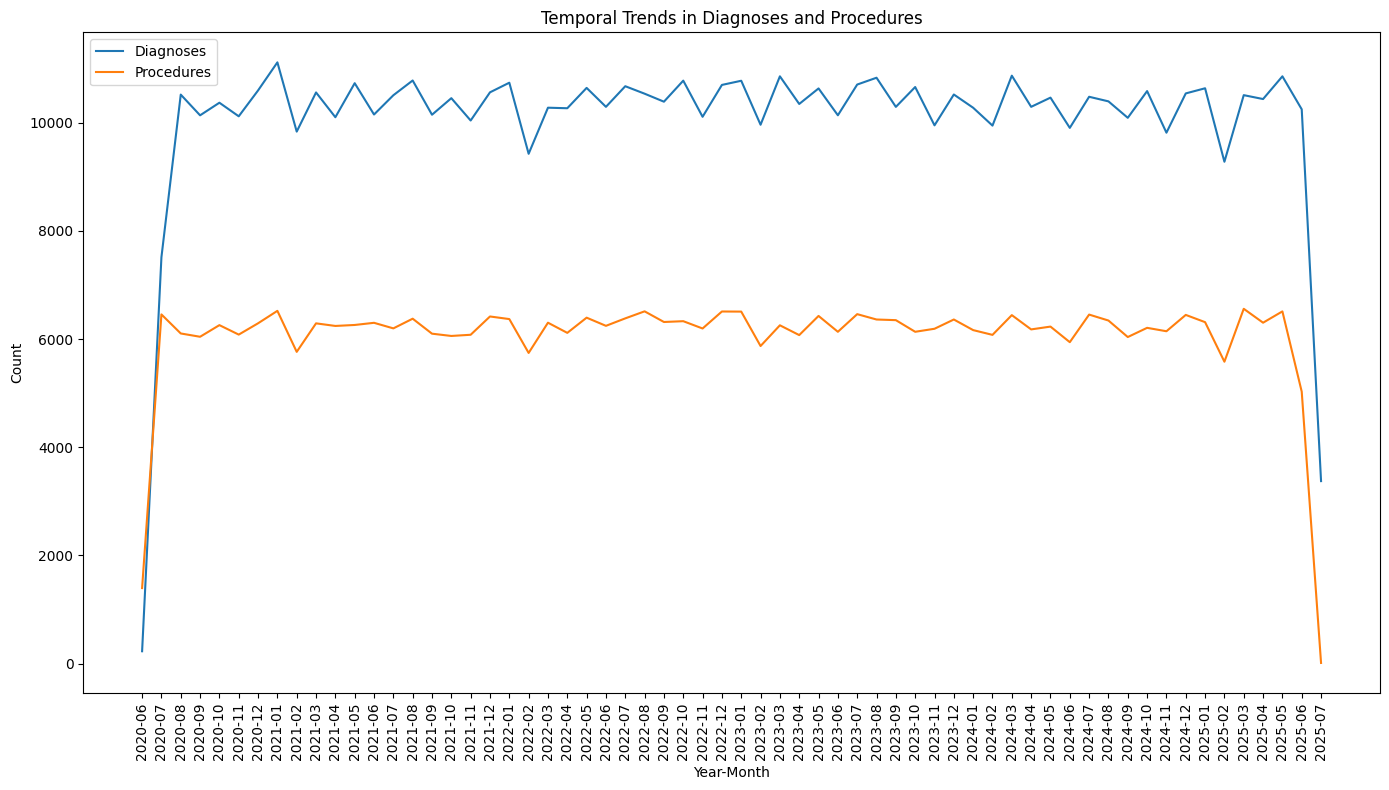

In [90]:
# Temporal trends in diagnoses and procedures over time

# Group diagnoses by month/year
diagnoses_trend = data_diagnoses.copy()
diagnoses_trend['YearMonth'] = diagnoses_trend['Last_Update_Timestamp'].dt.to_period('M')
diagnoses_counts = diagnoses_trend.groupby('YearMonth')['Diagnosis_ID'].count()

# Group procedures by month/year
procedures_trend = data_procedures.copy()
procedures_trend['YearMonth'] = procedures_trend['Last_Update_Timestamp'].dt.to_period('M')
procedures_counts = procedures_trend.groupby('YearMonth')['Procedure_ID'].count()

# Plot temporal trends
plt.figure(figsize=(14, 8))
plt.plot(diagnoses_counts.index.astype(str), diagnoses_counts.values, label='Diagnoses')
plt.plot(procedures_counts.index.astype(str), procedures_counts.values, label='Procedures')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Temporal Trends in Diagnoses and Procedures')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [92]:
# FHIR Gap Analysis: Compare table structures to FHIR R4 profiles

# Example: Compare data_patients to FHIR Patient resource
fhir_patient_fields = [
    'id', 'identifier', 'name', 'telecom', 'gender', 'birthDate', 'address', 'maritalStatus', 'communication', 'deceasedBoolean'
]
local_patient_fields = set(data_patients.columns)

missing_in_local = set(fhir_patient_fields) - local_patient_fields
extra_in_local = local_patient_fields - set(fhir_patient_fields)

print("FHIR Patient fields missing in local data_patients table:")
print(missing_in_local)
print("\nLocal fields not present in FHIR Patient resource:")
print(extra_in_local)



FHIR Patient fields missing in local data_patients table:
{'telecom', 'maritalStatus', 'communication', 'deceasedBoolean', 'address', 'id', 'birthDate', 'name', 'gender', 'identifier'}

Local fields not present in FHIR Patient resource:
{'Zip3_Code', 'Birth_Year', 'Patient_Hash_ID', 'Last_Update_Timestamp', 'Gender_Code', 'Patient_Surrogate_ID', 'Race_Ethnicity_Code'}


In [93]:
# FHIR Gap Analysis: Compare other local tables to their FHIR R4 resources

# Example: Compare data_encounters to FHIR Encounter resource
fhir_encounter_fields = [
    'id', 'status', 'class', 'type', 'subject', 'participant', 'period', 'reasonCode', 'diagnosis', 'serviceProvider'
]
local_encounter_fields = set(data_encounters.columns)

missing_in_local_encounter = set(fhir_encounter_fields) - local_encounter_fields
extra_in_local_encounter = local_encounter_fields - set(fhir_encounter_fields)

print("FHIR Encounter fields missing in local data_encounters table:")
print(missing_in_local_encounter)
print("\nLocal fields not present in FHIR Encounter resource:")
print(extra_in_local_encounter)

FHIR Encounter fields missing in local data_encounters table:
{'period', 'type', 'class', 'status', 'participant', 'serviceProvider', 'id', 'subject', 'diagnosis', 'reasonCode'}

Local fields not present in FHIR Encounter resource:
{'Location_Code', 'Encounter_Type_Code', 'Patient_Surrogate_ID', 'Encounter_Date', 'Last_Update_Timestamp', 'Encounter_ID', 'Attending_Prov_ID'}


In [94]:
# Example: Compare data_observations to FHIR Observation resource
fhir_observation_fields = [
    'id', 'status', 'category', 'code', 'subject', 'encounter', 'effectiveDateTime', 'valueQuantity', 'interpretation', 'referenceRange'
]
local_observation_fields = set(data_observations.columns)

missing_in_local_observation = set(fhir_observation_fields) - local_observation_fields
extra_in_local_observation = local_observation_fields - set(fhir_observation_fields)

print("\nFHIR Observation fields missing in local data_observations table:")
print(missing_in_local_observation)
print("\nLocal fields not present in FHIR Observation resource:")
print(extra_in_local_observation)




FHIR Observation fields missing in local data_observations table:
{'code', 'category', 'interpretation', 'status', 'referenceRange', 'id', 'subject', 'valueQuantity', 'encounter', 'effectiveDateTime'}

Local fields not present in FHIR Observation resource:
{'Observation_DateTime', 'LOINC_Code', 'Observation_ID', 'Value_Num', 'Last_Update_Timestamp', 'Value_Unit', 'Encounter_ID'}


In [95]:
# Example: Compare data_procedures to FHIR Procedure resource
fhir_procedure_fields = [
    'id', 'status', 'category', 'code', 'subject', 'encounter', 'performedDateTime', 'performer', 'reasonCode', 'bodySite'
]
local_procedure_fields = set(data_procedures.columns)

missing_in_local_procedure = set(fhir_procedure_fields) - local_procedure_fields
extra_in_local_procedure = local_procedure_fields - set(fhir_procedure_fields)

print("\nFHIR Procedure fields missing in local data_procedures table:")
print(missing_in_local_procedure)
print("\nLocal fields not present in FHIR Procedure resource:")
print(extra_in_local_procedure)


FHIR Procedure fields missing in local data_procedures table:
{'code', 'category', 'performedDateTime', 'status', 'performer', 'bodySite', 'id', 'subject', 'encounter', 'reasonCode'}

Local fields not present in FHIR Procedure resource:
{'Procedure_DateTime', 'CPT_Code', 'Last_Update_Timestamp', 'Encounter_ID', 'Procedure_ID'}
